In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 
import plotly.graph_objects as go
from scipy import stats

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)
pd.set_option('mode.chained_assignment', None)

In [2]:
df = pd.read_csv('/kaggle/input/water-data/archive (2)/water_potability.csv')

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Filling the null values with mean values of their columns

In [6]:
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes']= df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [7]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


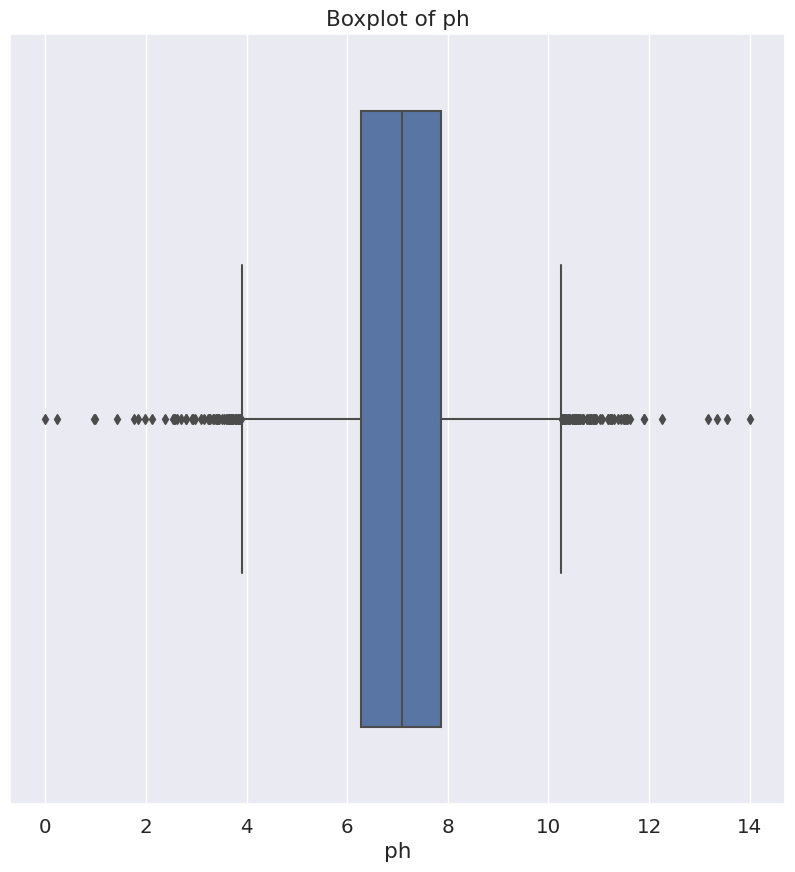

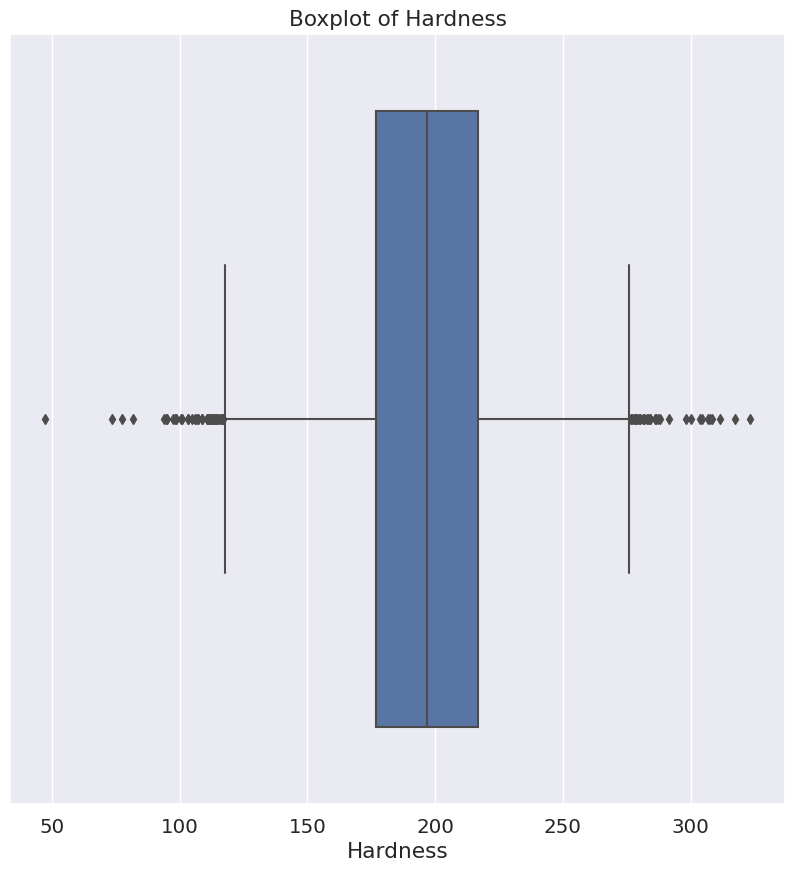

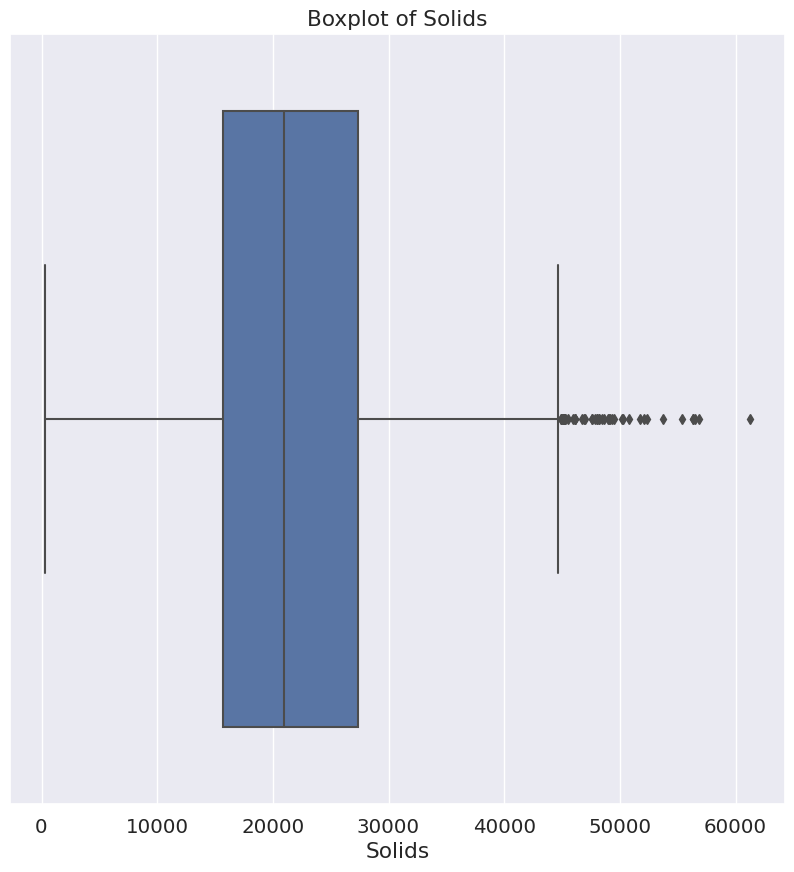

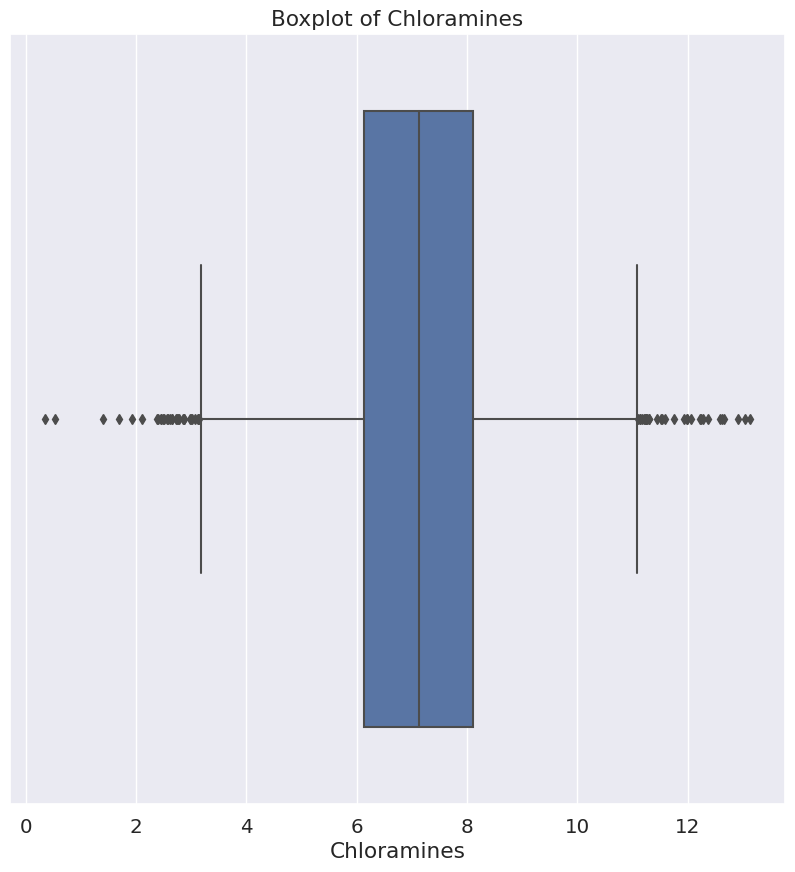

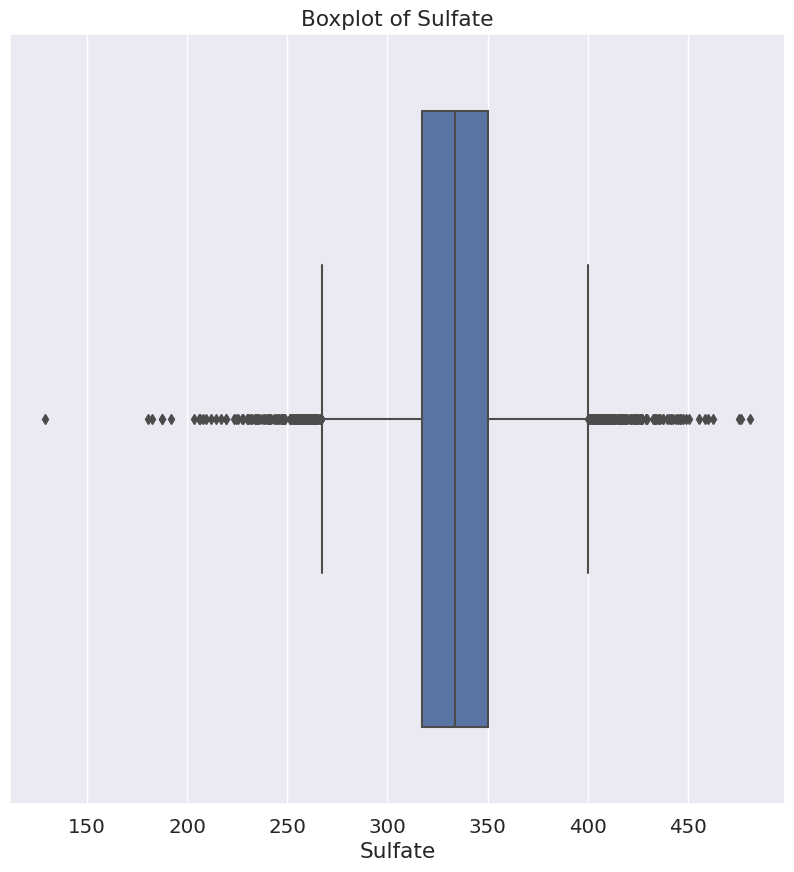

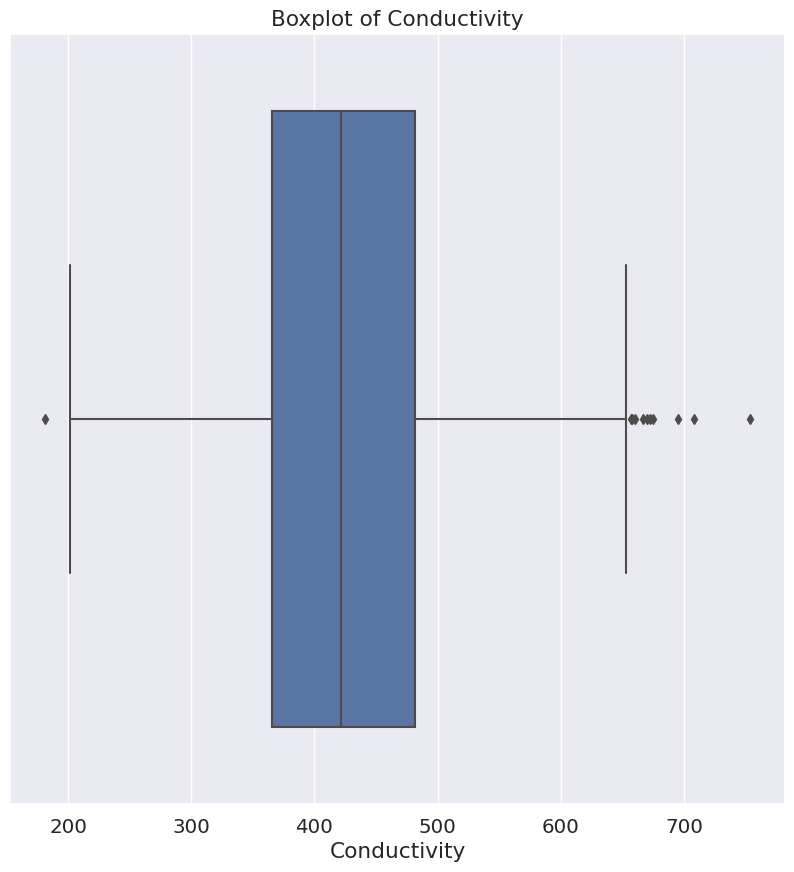

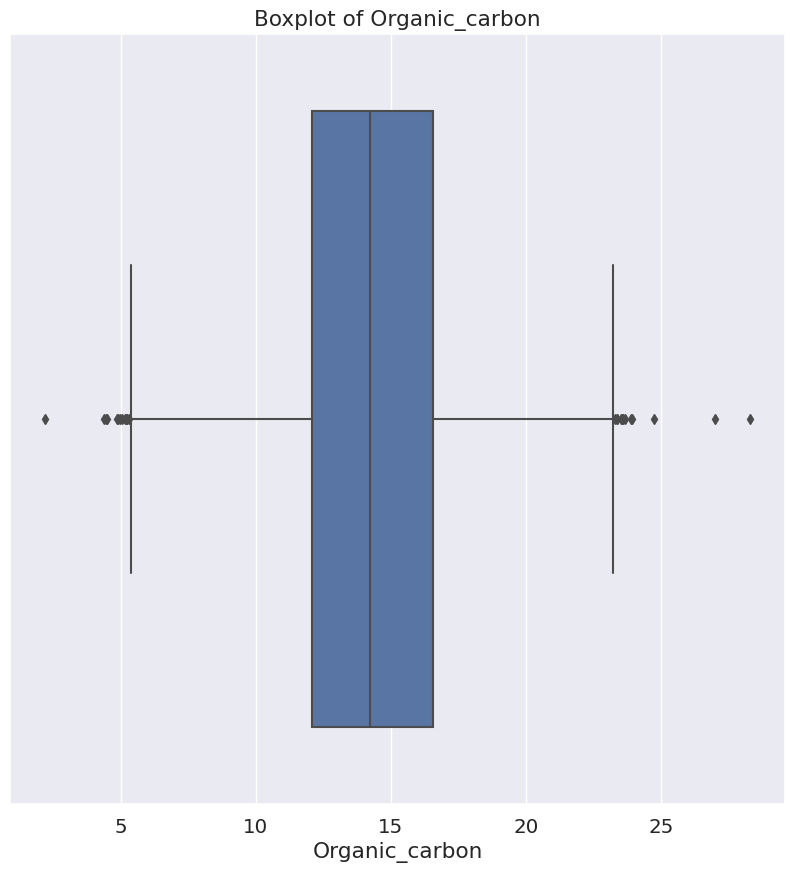

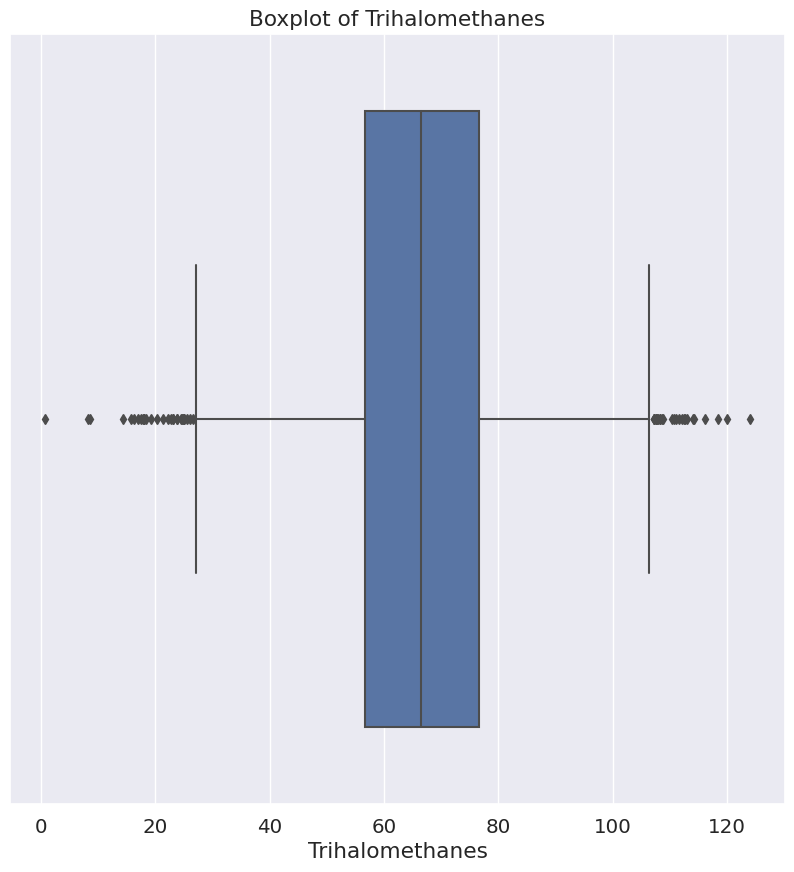

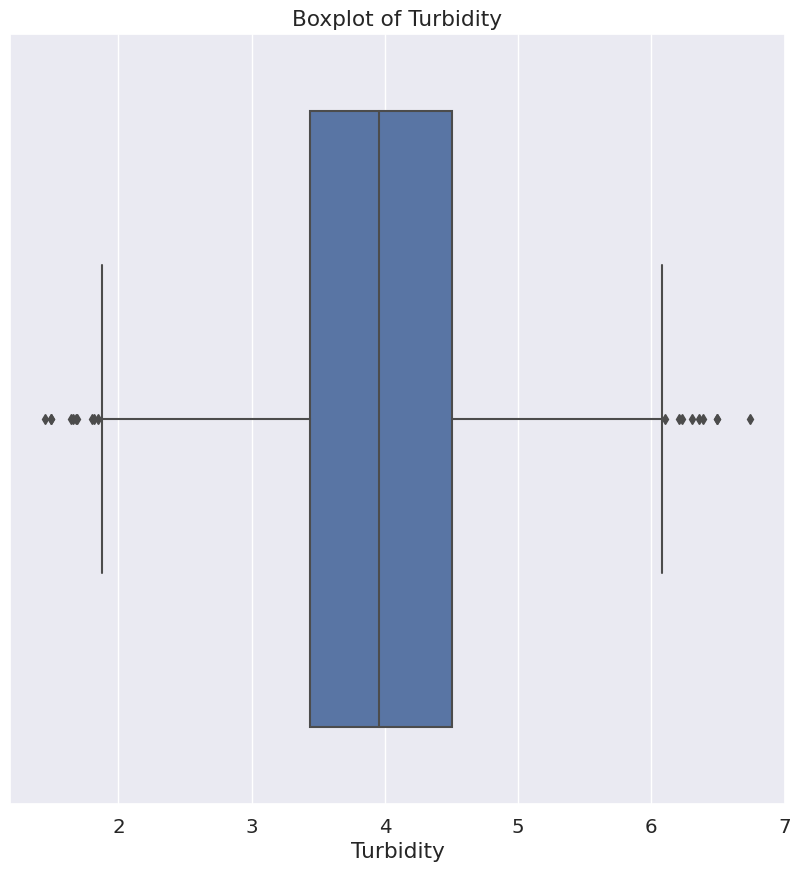

In [8]:
for col in df.columns[:-1]:
    plt.figure()  
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [9]:
def remove_outliers(df):
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df
df=remove_outliers(df)

In [10]:
df.shape

(2657, 10)

In [11]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

Pearson Correlation Coefficients

In [12]:
# Selecting features and target variable
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
            'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']

# Calculate Pearson correlation coefficient for each feature
correlation_coefficients = {}
for feature in features[:-1]:  
    correlation_coefficient = df[feature].corr(df['Potability'])
    correlation_coefficients[feature] = correlation_coefficient
sorted_coefficients = sorted(correlation_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)
print("Pearson Correlation Coefficients:")
for feature, coefficient in sorted_coefficients:
    print(f"{feature}: {coefficient}")

threshold = 0.01 
selected_features = []
for feature, coefficient in sorted_coefficients:
    if abs(coefficient) > threshold:
        selected_features.append(feature)
print("Selected Features:")
for feature in selected_features:
    print(feature)

Pearson Correlation Coefficients:
Organic_carbon: -0.030160834157191035
Trihalomethanes: 0.014416482237957138
Chloramines: 0.012948346034189801
Sulfate: -0.011607215490736436
ph: -0.008260650976766478
Solids: 0.007163838207426243
Turbidity: 0.004178365527899585
Conductivity: 0.0005129939071274747
Hardness: -0.00034725667726233817
Selected Features:
Organic_carbon
Trihalomethanes
Chloramines
Sulfate


Spearman Correlation Coefficients

In [24]:
from scipy.stats import spearmanr

# Calculate Spearman correlation coefficient for each feature
correlation_coefficients = {}
for feature in features[:-1]:  
    correlation_coefficient, _ = spearmanr(df[feature], df['Potability'])
    correlation_coefficients[feature] = correlation_coefficient
sorted_coefficients = sorted(correlation_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)
print("Spearman Correlation Coefficients:")
for feature, coefficient in sorted_coefficients:
    print(f"{feature}: {coefficient}")

threshold = 0.01 
selected_features = []
for feature, coefficient in sorted_coefficients:
    if abs(coefficient) > threshold:
        selected_features.append(feature)
print("Selected Features:")
for feature in selected_features:
    print(feature)


Spearman Correlation Coefficients:
Organic_carbon: -0.02867506072718385
Chloramines: 0.016211876438289002
Trihalomethanes: 0.01304816017277071
Sulfate: -0.011229623089660546
ph: -0.0061100424147051855
Hardness: 0.004687893699810545
Solids: 0.004046883570368688
Conductivity: -0.002888602608624066
Turbidity: 0.0025680975439031375
Selected Features:
Organic_carbon
Chloramines
Trihalomethanes
Sulfate


LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, SVC, KNeighborsClassifier These are all machine learning algorithms we are going to use for this task.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [14]:
from imblearn.over_sampling import SMOTE
X = df[['Chloramines', 'Sulfate','Organic_carbon', 'Trihalomethanes']]
y=df['Potability']
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
print(y.value_counts())

Potability
0    1664
1    1664
Name: count, dtype: int64


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'k-Nearest Neighbors': KNeighborsClassifier()
}
for name, clf in classifiers.items():

    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
  
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    
    print(f"Classifier: {name}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:")
    print(f"TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}")
    print()

Classifier: Logistic Regression
Training Accuracy: 0.5255
Test Accuracy: 0.5180
Precision: 0.5137
Recall: 0.5680
F1 Score: 0.5395
Confusion Matrix:
TP: 188, FP: 178, TN: 157, FN: 143

Classifier: Decision Tree
Training Accuracy: 1.0000
Test Accuracy: 0.5706
Precision: 0.5664
Recall: 0.5801
F1 Score: 0.5731
Confusion Matrix:
TP: 192, FP: 147, TN: 188, FN: 139

Classifier: Random Forest
Training Accuracy: 1.0000
Test Accuracy: 0.6246
Precision: 0.6254
Recall: 0.6103
F1 Score: 0.6177
Confusion Matrix:
TP: 202, FP: 121, TN: 214, FN: 129

Classifier: Support Vector Machine
Training Accuracy: 0.5116
Test Accuracy: 0.5105
Precision: 0.5207
Recall: 0.1903
F1 Score: 0.2788
Confusion Matrix:
TP: 63, FP: 58, TN: 277, FN: 268

Classifier: k-Nearest Neighbors
Training Accuracy: 0.7528
Test Accuracy: 0.5916
Precision: 0.5778
Recall: 0.6616
F1 Score: 0.6169
Confusion Matrix:
TP: 219, FP: 160, TN: 175, FN: 112



In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pandas as pd
X = df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
        'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = df['Potability']
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=7)  
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['ph', 'Hardness', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes'],
      dtype='object')


In [17]:
from imblearn.over_sampling import SMOTE
X = df[['ph', 'Hardness', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes']]
y=df['Potability']
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
print(y.value_counts())

Potability
0    1664
1    1664
Name: count, dtype: int64


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'k-Nearest Neighbors': KNeighborsClassifier()
}
for name, clf in classifiers.items():

    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
  
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    
    print(f"Classifier: {name}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:")
    print(f"TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}")
    print()

Classifier: Logistic Regression
Training Accuracy: 0.5173
Test Accuracy: 0.4895
Precision: 0.4869
Recall: 0.5045
F1 Score: 0.4955
Confusion Matrix:
TP: 167, FP: 176, TN: 159, FN: 164

Classifier: Decision Tree
Training Accuracy: 1.0000
Test Accuracy: 0.6441
Precision: 0.6328
Recall: 0.6767
F1 Score: 0.6540
Confusion Matrix:
TP: 224, FP: 130, TN: 205, FN: 107

Classifier: Random Forest
Training Accuracy: 1.0000
Test Accuracy: 0.7297
Precision: 0.7227
Recall: 0.7402
F1 Score: 0.7313
Confusion Matrix:
TP: 245, FP: 94, TN: 241, FN: 86

Classifier: Support Vector Machine
Training Accuracy: 0.5267
Test Accuracy: 0.5210
Precision: 0.5316
Recall: 0.3051
F1 Score: 0.3877
Confusion Matrix:
TP: 101, FP: 89, TN: 246, FN: 230

Classifier: k-Nearest Neighbors
Training Accuracy: 0.7675
Test Accuracy: 0.6486
Precision: 0.6280
Recall: 0.7190
F1 Score: 0.6704
Confusion Matrix:
TP: 238, FP: 141, TN: 194, FN: 93



In [19]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [20]:
X = df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
        'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = df['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
selected_features = X.columns[lasso_model.coef_ != 0]
print("Selected Features:")
for feature in selected_features:
    print(feature)

Selected Features:
Solids
Sulfate
Conductivity
Organic_carbon
Trihalomethanes


In [21]:
X = df[['Solids', 'Sulfate', 'Organic_carbon','Conductivity','Trihalomethanes']]
y=df['Potability']
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
print(y.value_counts())

Potability
0    1664
1    1664
Name: count, dtype: int64


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'k-Nearest Neighbors': KNeighborsClassifier()
}
for name, clf in classifiers.items():

    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
  
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    
    print(f"Classifier: {name}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:")
    print(f"TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}")
    print()

Classifier: Logistic Regression
Training Accuracy: 0.4902
Test Accuracy: 0.4820
Precision: 0.4792
Recall: 0.4864
F1 Score: 0.4828
Confusion Matrix:
TP: 161, FP: 175, TN: 160, FN: 170

Classifier: Decision Tree
Training Accuracy: 1.0000
Test Accuracy: 0.5586
Precision: 0.5536
Recall: 0.5770
F1 Score: 0.5651
Confusion Matrix:
TP: 191, FP: 154, TN: 181, FN: 140

Classifier: Random Forest
Training Accuracy: 1.0000
Test Accuracy: 0.6216
Precision: 0.6270
Recall: 0.5891
F1 Score: 0.6075
Confusion Matrix:
TP: 195, FP: 116, TN: 219, FN: 136

Classifier: Support Vector Machine
Training Accuracy: 0.5116
Test Accuracy: 0.4985
Precision: 0.4762
Recall: 0.0906
F1 Score: 0.1523
Confusion Matrix:
TP: 30, FP: 33, TN: 302, FN: 301

Classifier: k-Nearest Neighbors
Training Accuracy: 0.7449
Test Accuracy: 0.5826
Precision: 0.5707
Recall: 0.6465
F1 Score: 0.6062
Confusion Matrix:
TP: 214, FP: 161, TN: 174, FN: 117



In [23]:
X = df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
        'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = df['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'k-Nearest Neighbors': KNeighborsClassifier()
}
for name, clf in classifiers.items():

    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    precision = precision_score(y_test, y_test_pred, zero_division=1)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
  
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    
    print(f"Classifier: {name}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:")
    print(f"TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}")
    print()

Classifier: Logistic Regression
Training Accuracy: 0.6235
Test Accuracy: 0.6328
Precision: 1.0000
Recall: 0.0000
F1 Score: 0.0000
Confusion Matrix:
TP: 0, FP: 0, TN: 505, FN: 293

Classifier: Decision Tree
Training Accuracy: 1.0000
Test Accuracy: 0.5977
Precision: 0.4524
Recall: 0.4539
F1 Score: 0.4532
Confusion Matrix:
TP: 133, FP: 161, TN: 344, FN: 160

Classifier: Random Forest
Training Accuracy: 1.0000
Test Accuracy: 0.6541
Precision: 0.5691
Recall: 0.2389
F1 Score: 0.3365
Confusion Matrix:
TP: 70, FP: 53, TN: 452, FN: 223

Classifier: Support Vector Machine
Training Accuracy: 0.6235
Test Accuracy: 0.6328
Precision: 1.0000
Recall: 0.0000
F1 Score: 0.0000
Confusion Matrix:
TP: 0, FP: 0, TN: 505, FN: 293

Classifier: k-Nearest Neighbors
Training Accuracy: 0.7052
Test Accuracy: 0.5426
Precision: 0.3393
Recall: 0.2594
F1 Score: 0.2940
Confusion Matrix:
TP: 76, FP: 148, TN: 357, FN: 217

